<a href="https://colab.research.google.com/github/00kang/gis_deep_learning/blob/main/07_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Abalone_mini.csv

#### 데이터 전환

In [46]:
import csv
import numpy as np

with open('/content/abalone_mini.csv') as csvfile:
    csvreader = csv.reader(csvfile)

    rows = []
    
    for row in csvreader:
        rows.append(row)

new_rows = rows[1:]
data = np.zeros([10,11])

for n, row in enumerate(new_rows):
    if row[0] == 'M' : data[n,0] = 1
    if row[0] == 'F' : data[n,1] = 1
    if row[0] == 'I' : data[n,2] = 1

    data[n, 3:] = row[1:]

data

array([[ 1.    ,  0.    ,  0.    ,  0.455 ,  0.365 ,  0.095 ,  0.514 ,
         0.2245,  0.101 ,  0.15  , 15.    ],
       [ 1.    ,  0.    ,  0.    ,  0.35  ,  0.265 ,  0.09  ,  0.2255,
         0.0995,  0.0485,  0.07  ,  7.    ],
       [ 0.    ,  1.    ,  0.    ,  0.53  ,  0.42  ,  0.135 ,  0.677 ,
         0.2565,  0.1415,  0.21  ,  9.    ],
       [ 1.    ,  0.    ,  0.    ,  0.44  ,  0.365 ,  0.125 ,  0.516 ,
         0.2155,  0.114 ,  0.155 , 10.    ],
       [ 0.    ,  0.    ,  1.    ,  0.33  ,  0.255 ,  0.08  ,  0.205 ,
         0.0895,  0.0395,  0.055 ,  7.    ],
       [ 1.    ,  0.    ,  0.    ,  0.5   ,  0.4   ,  0.13  ,  0.6645,
         0.258 ,  0.133 ,  0.24  , 12.    ],
       [ 0.    ,  0.    ,  1.    ,  0.355 ,  0.28  ,  0.085 ,  0.2905,
         0.095 ,  0.0395,  0.115 ,  7.    ],
       [ 0.    ,  1.    ,  0.    ,  0.44  ,  0.34  ,  0.1   ,  0.451 ,
         0.188 ,  0.087 ,  0.13  , 10.    ],
       [ 1.    ,  0.    ,  0.    ,  0.365 ,  0.295 ,  0.08  ,  0.2555,
 

In [47]:
import pandas as pd
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,1.0,0.0,0.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,0.0,1.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,1.0,0.0,0.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,0.0,0.0,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0
5,1.0,0.0,0.0,0.500,0.400,0.130,0.6645,0.2580,0.1330,0.240,12.0
6,0.0,0.0,1.0,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.115,7.0
7,0.0,1.0,0.0,0.440,0.340,0.100,0.4510,0.1880,0.0870,0.130,10.0
8,1.0,0.0,0.0,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.100,7.0
9,1.0,0.0,0.0,0.450,0.320,0.100,0.3810,0.1705,0.0750,0.115,9.0


=> 독립변수 10개, 종속변수 1개<br>
= weight는 10개, bias는 1개

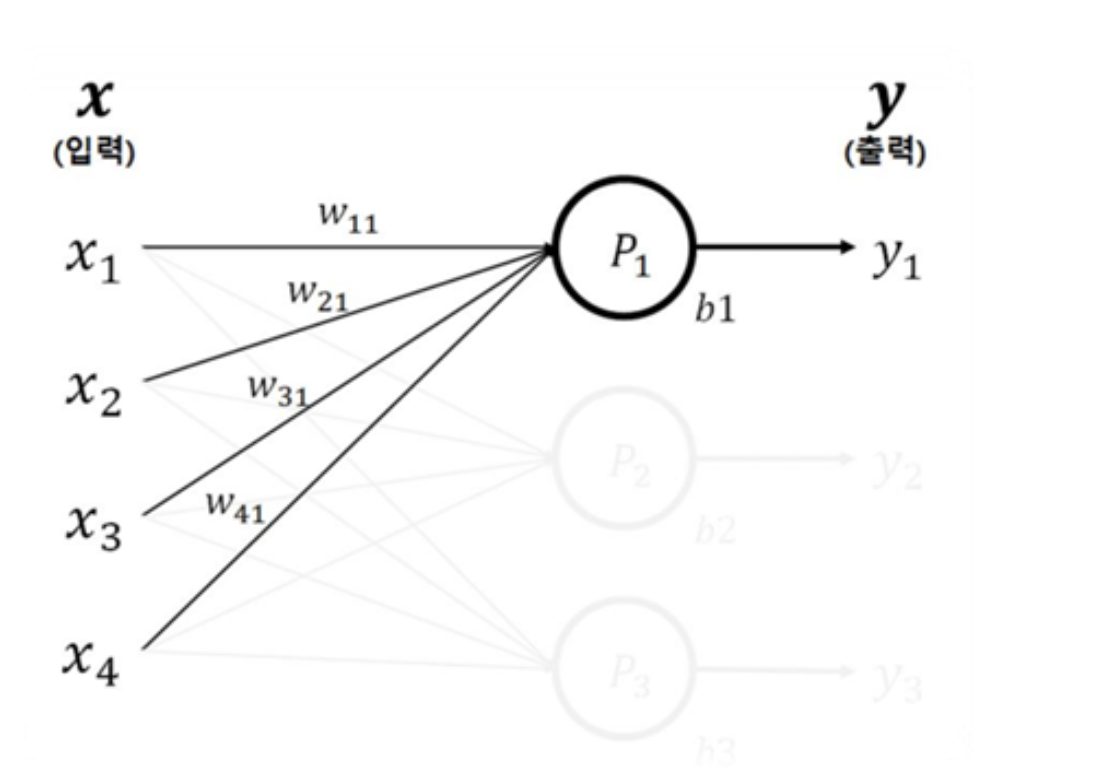

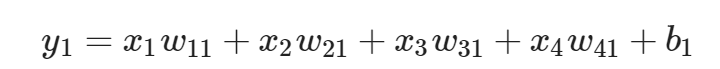

### 예측함수 만들기

#### main_exec()

In [48]:
def main_exec():
    #import_data() #데이터 불러오기
    model_init()  #모델 초기화
    run_train()   #모델 학습

In [49]:
RND_MEAN = 0 #정규분포의 평균
RND_STD = 1  #정규분포의 표준편차

input_x = 10 
output_y = 1

#### model_init()

In [50]:
def model_init():
    global weight, bias #함수 내외부 상관없이 아무곳에서나 사용 가능
    weight = np.random.normal(RND_MEAN, RND_STD, size=[input_x, output_y]) #10행 1열
    bias = np.random.normal(RND_MEAN, RND_STD, size=[output_y])

In [51]:
weight = np.random.normal(RND_MEAN, RND_STD, size=[input_x, output_y]) #10행 1열
print(weight)
print("-"*50)    
bias = np.random.normal(RND_MEAN, RND_STD, size=[output_y])
print(bias)

[[-0.15324688]
 [-0.88177348]
 [ 0.00617451]
 [-0.82562448]
 [ 0.11063375]
 [ 2.20271214]
 [-0.55963177]
 [ 0.86489322]
 [ 0.24001932]
 [ 1.35214587]]
--------------------------------------------------
[-0.8733042]


In [52]:
weight.shape, bias.shape

((10, 1), (1,))

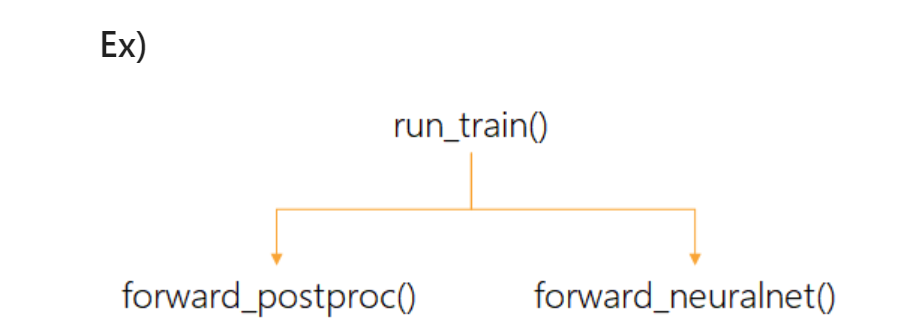

#### forward_neuralnet()

In [53]:
def forward_neuralnet(x): #연산 
    y_hat = np.matmul(x,weight) + bias
    return y_hat

    #y_hat == target_y == pred_y == 예측값
    #y_label == y == 실제값

In [54]:
data

array([[ 1.    ,  0.    ,  0.    ,  0.455 ,  0.365 ,  0.095 ,  0.514 ,
         0.2245,  0.101 ,  0.15  , 15.    ],
       [ 1.    ,  0.    ,  0.    ,  0.35  ,  0.265 ,  0.09  ,  0.2255,
         0.0995,  0.0485,  0.07  ,  7.    ],
       [ 0.    ,  1.    ,  0.    ,  0.53  ,  0.42  ,  0.135 ,  0.677 ,
         0.2565,  0.1415,  0.21  ,  9.    ],
       [ 1.    ,  0.    ,  0.    ,  0.44  ,  0.365 ,  0.125 ,  0.516 ,
         0.2155,  0.114 ,  0.155 , 10.    ],
       [ 0.    ,  0.    ,  1.    ,  0.33  ,  0.255 ,  0.08  ,  0.205 ,
         0.0895,  0.0395,  0.055 ,  7.    ],
       [ 1.    ,  0.    ,  0.    ,  0.5   ,  0.4   ,  0.13  ,  0.6645,
         0.258 ,  0.133 ,  0.24  , 12.    ],
       [ 0.    ,  0.    ,  1.    ,  0.355 ,  0.28  ,  0.085 ,  0.2905,
         0.095 ,  0.0395,  0.115 ,  7.    ],
       [ 0.    ,  1.    ,  0.    ,  0.44  ,  0.34  ,  0.1   ,  0.451 ,
         0.188 ,  0.087 ,  0.13  , 10.    ],
       [ 1.    ,  0.    ,  0.    ,  0.365 ,  0.295 ,  0.08  ,  0.2555,
 

In [55]:
data[:, :-1]

array([[1.    , 0.    , 0.    , 0.455 , 0.365 , 0.095 , 0.514 , 0.2245,
        0.101 , 0.15  ],
       [1.    , 0.    , 0.    , 0.35  , 0.265 , 0.09  , 0.2255, 0.0995,
        0.0485, 0.07  ],
       [0.    , 1.    , 0.    , 0.53  , 0.42  , 0.135 , 0.677 , 0.2565,
        0.1415, 0.21  ],
       [1.    , 0.    , 0.    , 0.44  , 0.365 , 0.125 , 0.516 , 0.2155,
        0.114 , 0.155 ],
       [0.    , 0.    , 1.    , 0.33  , 0.255 , 0.08  , 0.205 , 0.0895,
        0.0395, 0.055 ],
       [1.    , 0.    , 0.    , 0.5   , 0.4   , 0.13  , 0.6645, 0.258 ,
        0.133 , 0.24  ],
       [0.    , 0.    , 1.    , 0.355 , 0.28  , 0.085 , 0.2905, 0.095 ,
        0.0395, 0.115 ],
       [0.    , 1.    , 0.    , 0.44  , 0.34  , 0.1   , 0.451 , 0.188 ,
        0.087 , 0.13  ],
       [1.    , 0.    , 0.    , 0.365 , 0.295 , 0.08  , 0.2555, 0.097 ,
        0.043 , 0.1   ],
       [1.    , 0.    , 0.    , 0.45  , 0.32  , 0.1   , 0.381 , 0.1705,
        0.075 , 0.115 ]])

In [56]:
print(forward_neuralnet(data[:, :-1]))

[[-1.01898962]
 [-1.02180655]
 [-1.68793857]
 [-0.93954621]
 [-0.88862497]
 [-0.90105253]
 [-0.85744903]
 [-1.75359912]
 [-1.03260595]
 [-1.03466527]]


#### forward_postproc()

In [72]:
def forward_postproc(output, y): #MSE구하기
    
    
    diff = output - y
    print("diff:\n", diff)
    square = np.square(diff)
    print("square:\n", square)
    mse = np.mean(square)
    print("mse:\n", mse)
    
    return mse

In [58]:
data[:, :-1]

array([[1.    , 0.    , 0.    , 0.455 , 0.365 , 0.095 , 0.514 , 0.2245,
        0.101 , 0.15  ],
       [1.    , 0.    , 0.    , 0.35  , 0.265 , 0.09  , 0.2255, 0.0995,
        0.0485, 0.07  ],
       [0.    , 1.    , 0.    , 0.53  , 0.42  , 0.135 , 0.677 , 0.2565,
        0.1415, 0.21  ],
       [1.    , 0.    , 0.    , 0.44  , 0.365 , 0.125 , 0.516 , 0.2155,
        0.114 , 0.155 ],
       [0.    , 0.    , 1.    , 0.33  , 0.255 , 0.08  , 0.205 , 0.0895,
        0.0395, 0.055 ],
       [1.    , 0.    , 0.    , 0.5   , 0.4   , 0.13  , 0.6645, 0.258 ,
        0.133 , 0.24  ],
       [0.    , 0.    , 1.    , 0.355 , 0.28  , 0.085 , 0.2905, 0.095 ,
        0.0395, 0.115 ],
       [0.    , 1.    , 0.    , 0.44  , 0.34  , 0.1   , 0.451 , 0.188 ,
        0.087 , 0.13  ],
       [1.    , 0.    , 0.    , 0.365 , 0.295 , 0.08  , 0.2555, 0.097 ,
        0.043 , 0.1   ],
       [1.    , 0.    , 0.    , 0.45  , 0.32  , 0.1   , 0.381 , 0.1705,
        0.075 , 0.115 ]])

In [21]:
data[:, -1:]

array([[15.],
       [ 7.],
       [ 9.],
       [10.],
       [ 7.],
       [12.],
       [ 7.],
       [10.],
       [ 7.],
       [ 9.]])

In [73]:
forward_postproc(forward_neuralnet(data[:, :-1]), data[:, -1:]) #예측,실제

diff:
 [[-16.75133967]
 [ -8.66137203]
 [-10.38643307]
 [-11.72523646]
 [ -7.04160957]
 [-13.77218106]
 [ -7.05457312]
 [-11.35093468]
 [ -8.66246085]
 [-10.71072349]]
square:
 [[280.60738088]
 [ 75.01936537]
 [107.87799199]
 [137.48117001]
 [ 49.5842653 ]
 [189.67297103]
 [ 49.76700197]
 [128.84371819]
 [ 75.038228  ]
 [114.71959758]]
mse:
 120.86116903210696


120.86116903210696

#### run_train()

In [74]:
def run_train(x,y):
    output = forward_neuralnet(x)
    loss = forward_postproc(output, y)

    return output, loss

In [75]:
print(run_train(data[:,:-1], data[:,-1:]))

diff:
 [[-16.75133967]
 [ -8.66137203]
 [-10.38643307]
 [-11.72523646]
 [ -7.04160957]
 [-13.77218106]
 [ -7.05457312]
 [-11.35093468]
 [ -8.66246085]
 [-10.71072349]]
square:
 [[280.60738088]
 [ 75.01936537]
 [107.87799199]
 [137.48117001]
 [ 49.5842653 ]
 [189.67297103]
 [ 49.76700197]
 [128.84371819]
 [ 75.038228  ]
 [114.71959758]]
mse:
 120.86116903210696
(array([[-1.75133967],
       [-1.66137203],
       [-1.38643307],
       [-1.72523646],
       [-0.04160957],
       [-1.77218106],
       [-0.05457312],
       [-1.35093468],
       [-1.66246085],
       [-1.71072349]]), 120.86116903210696)


In [62]:
def import_data():
    pass #기능구현없이 공간만 확보해놓음

In [77]:
def main_exec(x,y):
    import_data()
    model_init()
    run_train(x,y)


In [78]:
main_exec(data[:,:-1], data[:,-1:]) #함수 하나로 모든 함수 활성화 가능

diff:
 [[-12.67629546]
 [ -4.94037559]
 [ -8.46478872]
 [ -7.61845359]
 [ -6.25218485]
 [ -9.49744662]
 [ -6.17725317]
 [ -9.71637853]
 [ -4.92500138]
 [ -6.84614579]]
square:
 [[160.6884665 ]
 [ 24.40731095]
 [ 71.65264814]
 [ 58.04083509]
 [ 39.08981541]
 [ 90.20149233]
 [ 38.15845669]
 [ 94.40801173]
 [ 24.25563859]
 [ 46.86971214]]
mse:
 64.77723875643048
